<a href="https://colab.research.google.com/github/herysedra/covid19-mankaiza-clone/blob/andrana/scripts/paper/simple_blocks/sir_mod_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib
import pickle

import pymc3 as pm
import theano.tensor as tt
import theano
import datetime
import time


cco_cases_mdg = pd.read_csv("/content/drive/My Drive/data/cco mdg.csv")


cco_cases_mdg.set_index('Date', inplace=True)


path_to_save = '/content/drive/My Drive/sary/'
path_data = '/content/drive/My Drive/data/'

In [0]:
date_data_begin = datetime.date(2020,4,2)
date_data_end = datetime.date(2020,4,15)


format_date = lambda date_py: '{}/{}/{}'.format(date_py.month, date_py.day,
                                                 str(date_py.year)[2:4])

date_formatted_begin = format_date(date_data_begin)
date_formatted_end = format_date(date_data_end)


cases_c_m_obs =  np.array(cco_cases_mdg.loc[date_formatted_begin:date_formatted_end, 'confirmes tvm'])
cco_vao_lst = list(cases_c_m_obs)

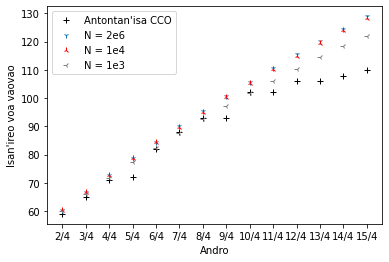

In [61]:
NT = 2e6
N10 = 1e4
N1 = 1e3

ST = NT - 54
S10 = N10 - 54
S1 = N1 - 54

ST3 = NT - 54
S103 = N10 - 54
S13 = N1 - 54

ItotT = 54
IvT = 4
IT = 54 # mbola tsy nisy sitrana hatreo

ItotT_lst = []
IvT_lst = []

Itot10 = 54
Iv10 = 4
I10 = 54 

Itot10_lst = []
Iv10_lst = []

Itot1 = 54
Iv1 = 4
I1 = 54 

Itot1_lst = []
Iv1_lst = []

ItotT3 = 54
IvT3 = 4
IT3 = 54 

ItotT3_lst = []
IvT3_lst = []

Itot103 = 54
Iv103 = 4
I103 = 54 

Itot103_lst = []
Iv103_lst = []

Itot13 = 54
Iv13 = 4
I13 = 54 

Itot13_lst = []
Iv13_lst = []

lc = 0.12
mc = 0.15

l3 = 0.45
m3 = 0.15

daty_lav = datetime.date(2020,4,1)
formatf_date = lambda date_py: '{}/{}'.format(date_py.day, date_py.month)

daty_lst = []


for el in range(14):
  daty_lav =  daty_lav + datetime.timedelta(days = 1)
  daty = formatf_date(daty_lav)
  daty_lst.append(daty)

  IvT = (lc/NT)*ST*IT
  ST = ST - (lc/NT)*IT
  IT = IT + IvT - mc*IT
  ItotT = ItotT + IvT
  
  ItotT_lst.append(round(ItotT, 2))
  IvT_lst.append(round(IvT, 2))
  
  Iv10 = (lc/N10)*S10*I10
  S10 = S10 - (lc/N10)*I10
  I10 = I10 + Iv10 - mc*I10
  Itot10 = Itot10 + Iv10 

  Itot10_lst.append(round(Itot10, 2))
  Iv10_lst.append(round(Iv10, 2))

  Iv1 = (lc/N1)*S1*I1
  S1 = S1 - (lc/N1)*I1
  I1 = I1 + Iv1 - mc*I1
  Itot1 = Itot1 + Iv1 

  Itot1_lst.append(round(Itot1, 2))
  Iv1_lst.append(round(Iv1, 2))

  IvT3 = (l3/NT)*ST3*IT3
  ST3 = ST3 - (l3/NT)*IT3
  IT3 = IT3 + IvT3 - m3*IT3
  ItotT3 = ItotT3 + IvT3

  ItotT3_lst.append(round(ItotT3, 2))
  IvT3_lst.append(round(IvT3, 2))

  Iv103 = (l3/N10)*S103*I103
  S103 = S103 - (l3/N10)*I103
  I103 = I103 + Iv103 - m3*I103
  Itot103 = Itot103 + Iv103 

  Itot103_lst.append(round(Itot103, 2))
  Iv103_lst.append(round(Iv103, 2))

  Iv13 = (l3/N1)*S13*I13
  S13 = S13 - (l3/N1)*I13
  I13 = I13 + Iv13 - m3*I13
  Itot13 = Itot13 + Iv13

  Itot13_lst.append(round(Itot13, 2))
  Iv13_lst.append(round(Iv13, 2))

 # print(daty, round(ItotT, 2), '&', round(IvT, 2), '&', round(Itot10, 2), '&', round(Iv10, 2), '&', round(Itot1, 2), '&', round(Iv1, 2), '&', round(ItotT3, 2), '&', round(IvT3, 2), '&', round(Itot103, 2), '&', round(Iv103, 2), '&', round(Itot13, 2), '&', round(Iv13, 2))
#print('ItotT :', ItotT_lst, sep=" ")




plt.figure()
plt.plot(daty_lst, cco_vao_lst, marker ="+",ls = 'None', color='black',label="Antontan'isa CCO")
plt.plot(daty_lst,ItotT_lst, "1", ls = 'None', label='N = 2e6')
plt.plot(daty_lst,Itot10_lst, marker ="2",ls = 'None', color='red',label='N = 1e4')
plt.plot(daty_lst,Itot1_lst, marker = "3", ls = 'None', color='grey', label='N = 1e3')
plt.xlabel('Andro')
plt.ylabel("Isan'ireo voa vaovao")
plt.legend(loc= 'best')
plt.savefig(path_to_save+'R0ccoSIRmiv.png')

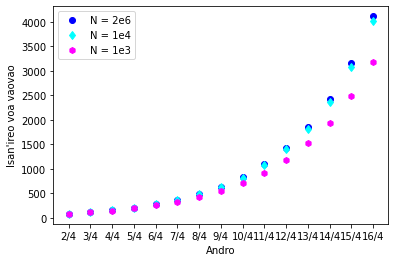

In [50]:
plt.figure()
plt.plot(daty_lst,ItotT3_lst, "o", ls = 'None', color='blue', label='N = 2e6')
plt.plot(daty_lst,Itot103_lst, marker ="d",ls = 'None', color='cyan',label='N = 1e4')
plt.plot(daty_lst,Itot13_lst, marker = "h", ls = 'None', color='fuchsia', label='N = 1e3')
plt.xlabel('Andro')
plt.ylabel("Isan'ireo voa vaovao")
plt.legend(loc= 'best')
plt.savefig(path_to_save+'R03SIRmiv.png')

In [0]:
"""
λ = tt.iscalar("λ")
μ = tt.iscalar("μ")
S_t = tt.matrix("S_t")
I_t = tt.matrix("I_t")
N = tt.iscalar("N")
S_begin = tt.matrix("S_begin")
I_begin = tt.matrix("I_begin")
I_all = tt.matrix
andro = tt.iscalar("andro")

s0 = tt.matrix()
i0 = tt.matrix()
ni0 = tt.matrix()
"""

def SIR_model(λ, μ, S_begin, I_begin, N):
    new_I_0 = tt.zeros_like(I_begin)
    def next_day(λ, S_t, I_t, _):
        new_I_t = λ/N*I_t*S_t
        S_t = S_t - new_I_t
        I_t = I_t + new_I_t - μ * I_t
        return S_t, I_t, new_I_t
    outputs , _  = theano.scan(fn=next_day, sequences=[λ],
                               n_steps = andro, 
                               outputs_info=[S_begin, I_begin, new_I_0])
    S_all, I_all, new_I_all = outputs
    return S_all, I_all, new_I_all 

N_tana = 2000000
I_begin = 54
S_begin = N_tana - I_begin

S_past, I_past, new_I_past = SIR_model(λ=0.45*tt.ones(14), μ=0.15, 
                                               S_begin=S_begin, I_begin=I_begin,
                                               N=N_tana)
print(new_I_past)

AttributeError: ignored

In [0]:
def SIR_model(λ, μ, S_begin, I_begin, N):
    new_I_0 = tt.zeros_like(I_begin)
    def next_day(λ, S_t, I_t, _):
        new_I_t = λ/N*I_t*S_t
        S_t = S_t - new_I_t
        I_t = I_t + new_I_t - μ * I_t
        return S_t, I_t, new_I_t
    outputs , _  = theano.scan(fn=next_day, sequences=[λ], 
                               outputs_info=[S_begin, I_begin, new_I_0])
    S_all, I_all, new_I_all = outputs
    return S_all, I_all, new_I_all

#  SIR_mod_funct = theano.function(
#     inputs = λ, μ, S_begin, I_begin, N
#     outputs = S_past, I_past, new_I_past
    )
with pm.Model() as model:
    # true cases at begin of loaded data but we do not know the real number
    I_begin = pm.HalfCauchy('I_begin', beta=100)

    # fraction of people that are newly infected each day
    λ = pm.Lognormal("λ", mu=np.log(0.4), sigma=0.5)

    # fraction of people that recover each day, recovery rate mu
    μ = pm.Lognormal('μ', mu=np.log(1/8), sigma=0.2)

    # delay in days between contracting the disease and being recorded
    delay = pm.Lognormal("delay", mu=np.log(8), sigma=0.2)

    # prior of the error of observed cases
    σ_obs = pm.HalfCauchy("σ_obs", beta=10)

    N_germany = 83e6

   # -------------------------------------------------------------------------- #
    # training the model with loaded data
    # -------------------------------------------------------------------------- #

    S_begin = N_germany - I_begin
    S_past, I_past, new_I_past = SIR_model(λ=λ * tt.ones(num_days-1), μ=μ, 
                                               S_begin=S_begin, I_begin=I_begin,
                                               N=N_germany)
    new_cases_obs = np.diff(cases_obs)
    new_cases_inferred = delay_cases(new_I_past, len_new_I_t=num_days - 1, 
                                     len_new_cases_obs=len(new_cases_obs), 
                                     delay=delay, delay_arr=diff_data_sim)

    # Approximates Poisson
    # calculate the likelihood of the model:
    # observed cases are distributed following studentT around the model
    pm.StudentT(
        "obs",
        nu=4,
        mu=new_cases_inferred,
        sigma=(new_cases_inferred)**0.5 * σ_obs,
        observed=new_cases_obs)  
    
    S_past = pm.Deterministic('S_past', S_past)
    I_past = pm.Deterministic('I_past', I_past)
    new_I_past = pm.Deterministic('new_I_past', new_I_past)
    new_cases_past = pm.Deterministic('new_cases_past', new_cases_inferred)
    
    """"
    Mahasedra: 
    pymc3.model.Deterministic(name, var, model=None)¶
    Create a named deterministic variable
    Parameters: name string ; var theano variables
    Returns : var, with name attribute
    
    In the case of the simple SIR model, the variables S, new_I and 
    new_(reported)cases are determined from the SIR model that why they are 
    deterministic.
    """"

    # -------------------------------------------------------------------------- #
    # prediction, start with no changes in policy
    # -------------------------------------------------------------------------- #

    S_begin = S_past[-1]
    I_begin = I_past[-1]
    forecast_no_change = SIR_model(λ=λ*tt.ones(num_days_to_predict), μ=μ, 
                        S_begin=S_begin, I_begin=I_begin, N=N_germany)
    S_no_change, I_no_change, new_I_no_change = forecast_no_change

    #saves the variables for later retrieval
    pm.Deterministic('S_no_change', S_no_change)
    pm.Deterministic('I_no_change', I_no_change)
    pm.Deterministic('new_I_no_change', new_I_no_change)

    new_cases_inferred = delay_cases(tt.concatenate([new_I_past[-diff_data_sim:], new_I_no_change]), 
                                     len_new_I_t=diff_data_sim + num_days_to_predict, 
                                     len_new_cases_obs=num_days_to_predict, 
                                     delay=delay, delay_arr=diff_data_sim)
    pm.Deterministic('new_cases_no_change', new_cases_inferred)



In [0]:
   # -------------------------------------------------------------------------- #
    # social distancing, m reduced by about 50 percent
    # -------------------------------------------------------------------------- #
    #For all following predictions:
    length_transient = 7  # days


    # λ is decreased by 50%
    reduc_factor_mild = 0.5
    days_offset = 0  # start the decrease in spreading rate after this

    time_arr = np.arange(num_days_to_predict)

    # change in m along time
    λ_correction = tt.clip((time_arr - days_offset) / length_transient, 0, 1)
    λ_t_soc_dist= λ * (1 - λ_correction * reduc_factor_mild) 

    S_begin = S_past[-1]
    I_begin = I_past[-1]
    forecast_soc_dist = SIR_model(λ=λ_t_soc_dist, μ=μ, 
                        S_begin=S_begin, I_begin=I_begin, 
                        N=N_germany)
    S_soc_dist, I_soc_dist, new_I_soc_dist = forecast_soc_dist
    pm.Deterministic('S_soc_dist', S_soc_dist)
    pm.Deterministic('I_soc_dist', I_soc_dist)
    pm.Deterministic('new_I_soc_dist', new_I_soc_dist)

    new_cases_inferred = delay_cases(tt.concatenate([new_I_past[-diff_data_sim:], new_I_soc_dist]), 
                                    len_new_I_t=diff_data_sim + num_days_to_predict, 
                                    len_new_cases_obs=num_days_to_predict, 
                                    delay=delay, delay_arr=diff_data_sim)
    pm.Deterministic('new_cases_soc_dist', new_cases_inferred)

In [0]:
  # -------------------------------------------------------------------------- #
    # isolation, almost no new infections besides baseline after transient phase
    # -------------------------------------------------------------------------- #

    # λ is decreased by 90%
    reduc_factor_strong = 0.9
    days_offset = 0  # start the decrease in spreading rate after this

    # spreading of people who transmit although they are isolated
    time_arr = np.arange(num_days_to_predict)

    # change in λ along time
    λ_correction = tt.clip((time_arr - days_offset) / length_transient, 0, 1)
    λ_t_isol= λ * (1 - λ_correction * reduc_factor_strong)

    S_begin = S_past[-1]
    I_begin = I_past[-1]
    forecast_isol = SIR_model(λ=λ_t_isol , μ=μ, 
                              S_begin=S_begin, I_begin=I_begin, 
                              N=N_germany)
    S_isol, I_isol, new_I_isol = forecast_isol

    pm.Deterministic('S_isol', S_isol)
    pm.Deterministic('I_isol', I_isol)  
    pm.Deterministic('new_I_isol', new_I_isol)

    new_cases_inferred = delay_cases(tt.concatenate([new_I_past[-diff_data_sim:], new_I_isol]), 
                                len_new_I_t=diff_data_sim + num_days_to_predict, 
                                len_new_cases_obs=num_days_to_predict, 
                                delay=delay, delay_arr=diff_data_sim)
    pm.Deterministic('new_cases_isol', new_cases_inferred)
